In [149]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import seaborn as sns 
import datetime
%matplotlib inline


In [150]:
#  Import and read the cash_data.csv.
import pandas as pd 
cash_df = pd.read_csv("LB_Forecast_Cash.csv")
cash_df.head()

,Year,Week,Date,Cash,Recievables
0,2022,31,1/3/2022,1347046.53,216637.49
1,2022,32,1/10/2022,1348547.51,220001.93
2,2022,33,1/17/2022,1362682.96,186053.69
3,2022,34,1/24/2022,1297296.15,291930.41
4,2022,35,1/31/2022,1328902.74,298268.57


In [151]:
# Drop the non-beneficial ID columns, 'Year'.
cash_df.drop(['Year'], axis=1, inplace=True)

In [152]:
# Determine the number of unique values in each column.
cash_df.nunique()

Week           50
Date           50
Cash           50
Recievables    45
dtype: int64

In [153]:
# Look at APPLICATION_TYPE value counts for binning
cash_type_counts = cash_df['Cash'].value_counts()
cash_type_counts

1347046.53    1
1190238.49    1
1304364.28    1
1261909.63    1
1236691.88    1
1014785.56    1
1133650.37    1
1161283.97    1
1128302.52    1
1123132.28    1
1124330.80    1
1160669.15    1
1214039.45    1
1348547.51    1
1241409.75    1
1255707.57    1
1238016.13    1
1167949.74    1
1179447.65    1
1206666.30    1
1342166.25    1
1349235.80    1
1364913.41    1
1408474.30    1
1237273.42    1
1307593.21    1
1346230.42    1
1431530.95    1
1362682.96    1
1297296.15    1
1328902.74    1
1323508.00    1
1303868.81    1
1305221.38    1
1299636.89    1
1286504.39    1
1311554.52    1
1468436.95    1
1462666.44    1
1430839.10    1
1405144.19    1
1355927.76    1
1460328.96    1
1517710.38    1
1517876.59    1
1392393.04    1
1367283.46    1
1547313.41    1
1487014.83    1
1404733.85    1
Name: Cash, dtype: int64

In [154]:
cash_df.isnull().sum()

Week           0
Date           0
Cash           0
Recievables    0
dtype: int64

In [155]:
x = cash_df[['Cash']]
y = cash_df['Recievables']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Recievables')

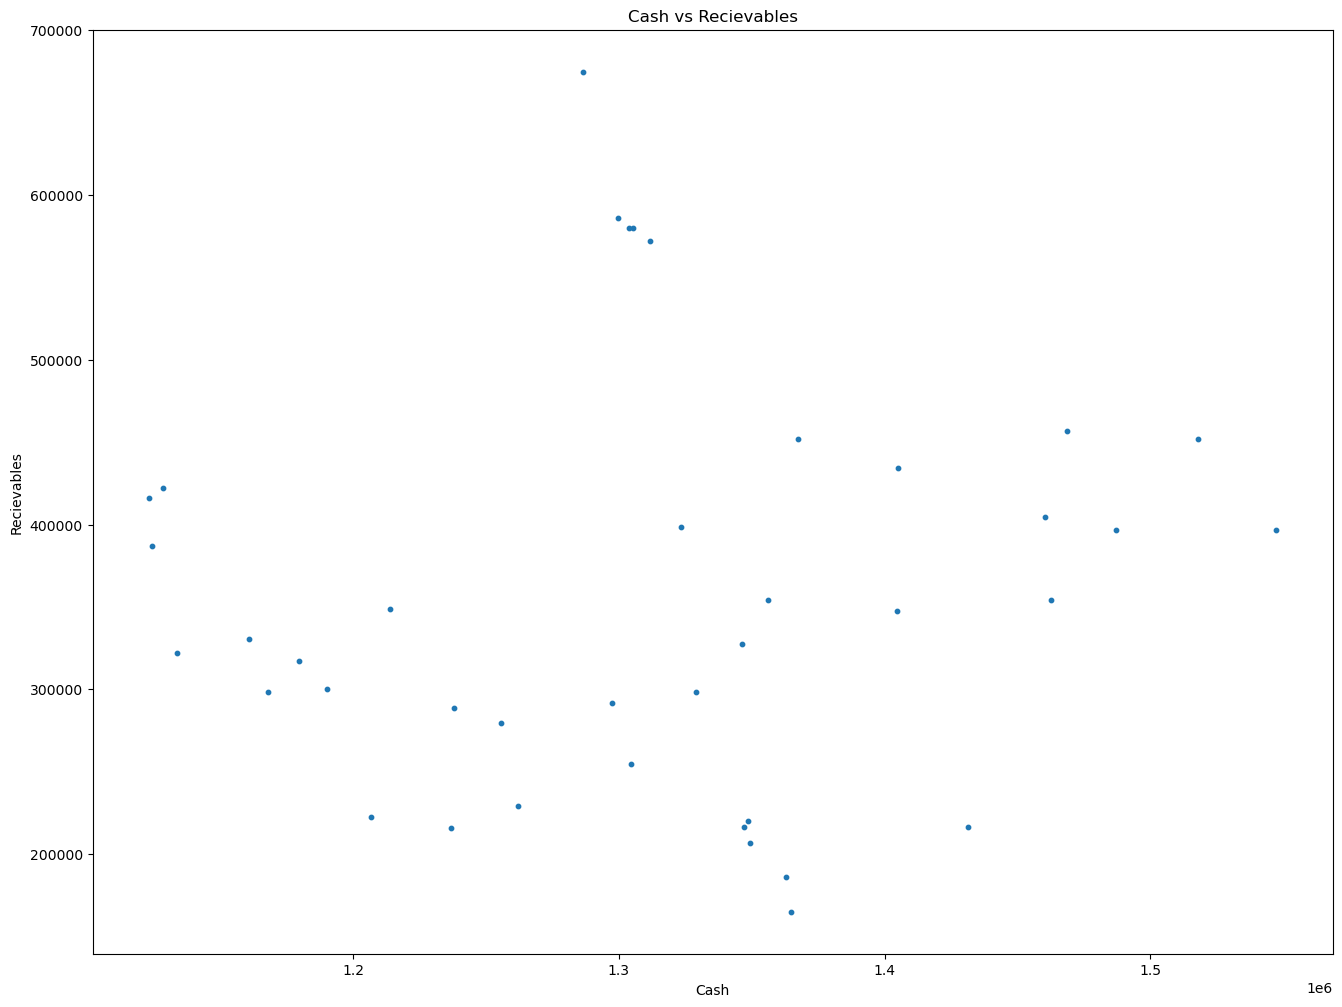

In [156]:
plt.scatter(x_train['Cash'], y_train, s=10)
plt.title('Cash vs Recievables')
plt.xlabel ('Cash')
plt.ylabel ('Recievables')

In [157]:
lr = LinearRegression()
lr.fit (x_train, y_train)

LinearRegression()

In [158]:
print (lr.intercept_)
print (lr.coef_)

229132.83827108316
[0.09606524]


Text(0, 0.5, 'Recievables')

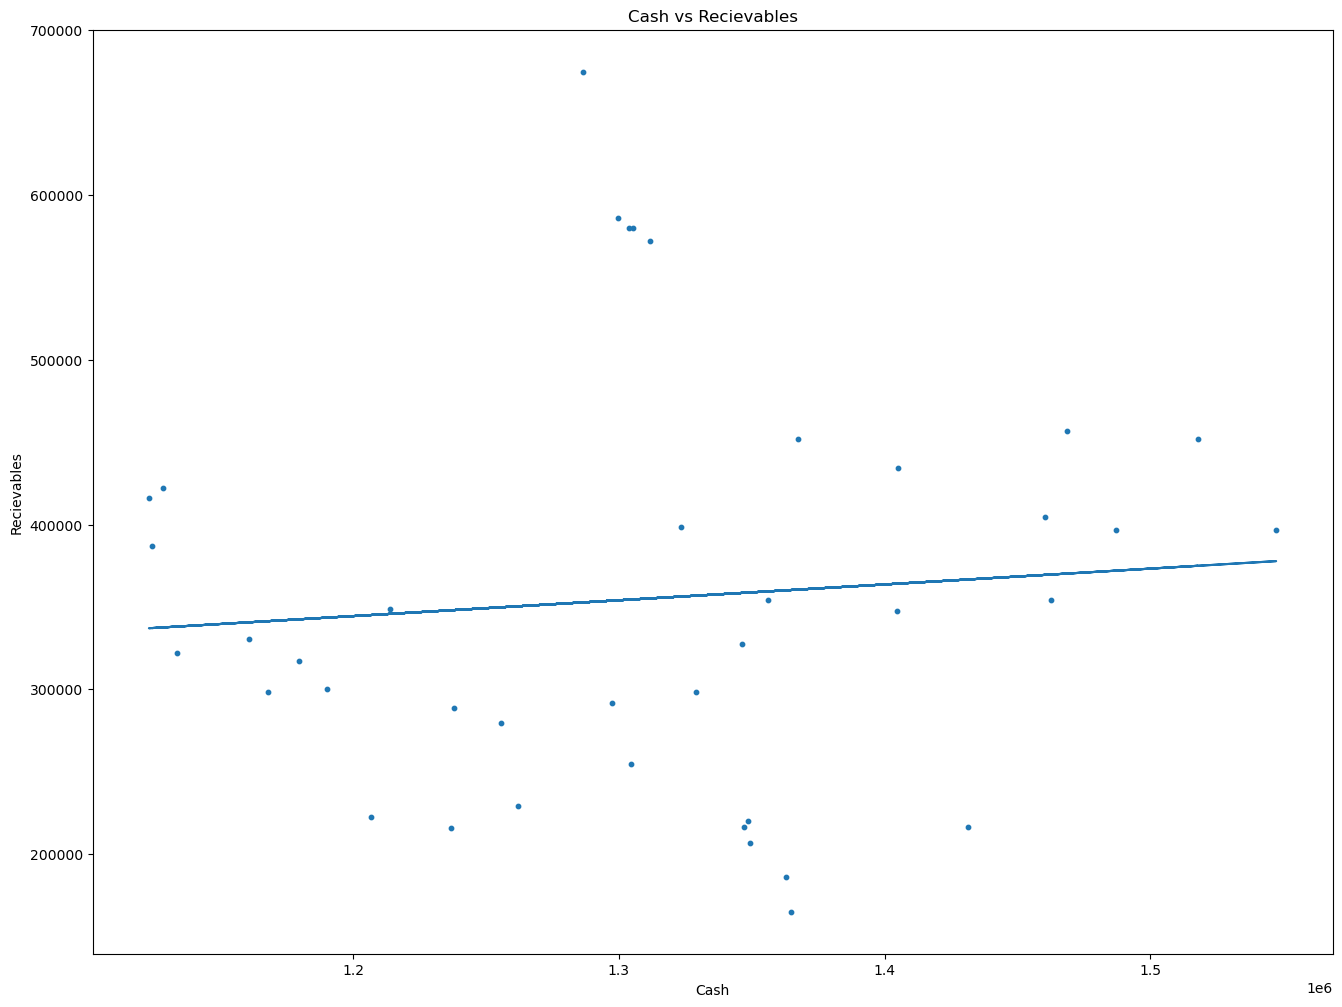

In [159]:
plt.scatter(x_train['Cash'], y_train, s=10)
y_pred = lr.predict(x_train)
plt.plot(x_train['Cash'], y_pred)

plt.title('Cash vs Recievables')
plt.xlabel('Cash')
plt.ylabel ('Recievables')

In [160]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

121040.92031357488
0.00775152375407695


In [161]:
y_pred_test = lr.predict(x_test)
RMSE =  mean_squared_error (y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

83013.6165149443
-0.3090407617535367


In [162]:
from sklearn.preprocessing import PolynomialFeatures
poly_features =  PolynomialFeatures (degree=2)
x_train_transformed = poly_features.fit_transform(x_train)

In [163]:
print(x_train_transformed[0])

[1.00000000e+00 1.46266644e+06 2.13939311e+12]


In [164]:
pr = LinearRegression()
pr.fit(x_train_transformed,y_train)
print(pr.intercept_)
print(pr.coef_)

1631706.9054997866
[ 0.00000000e+00 -2.05173899e+00  8.16343392e-07]


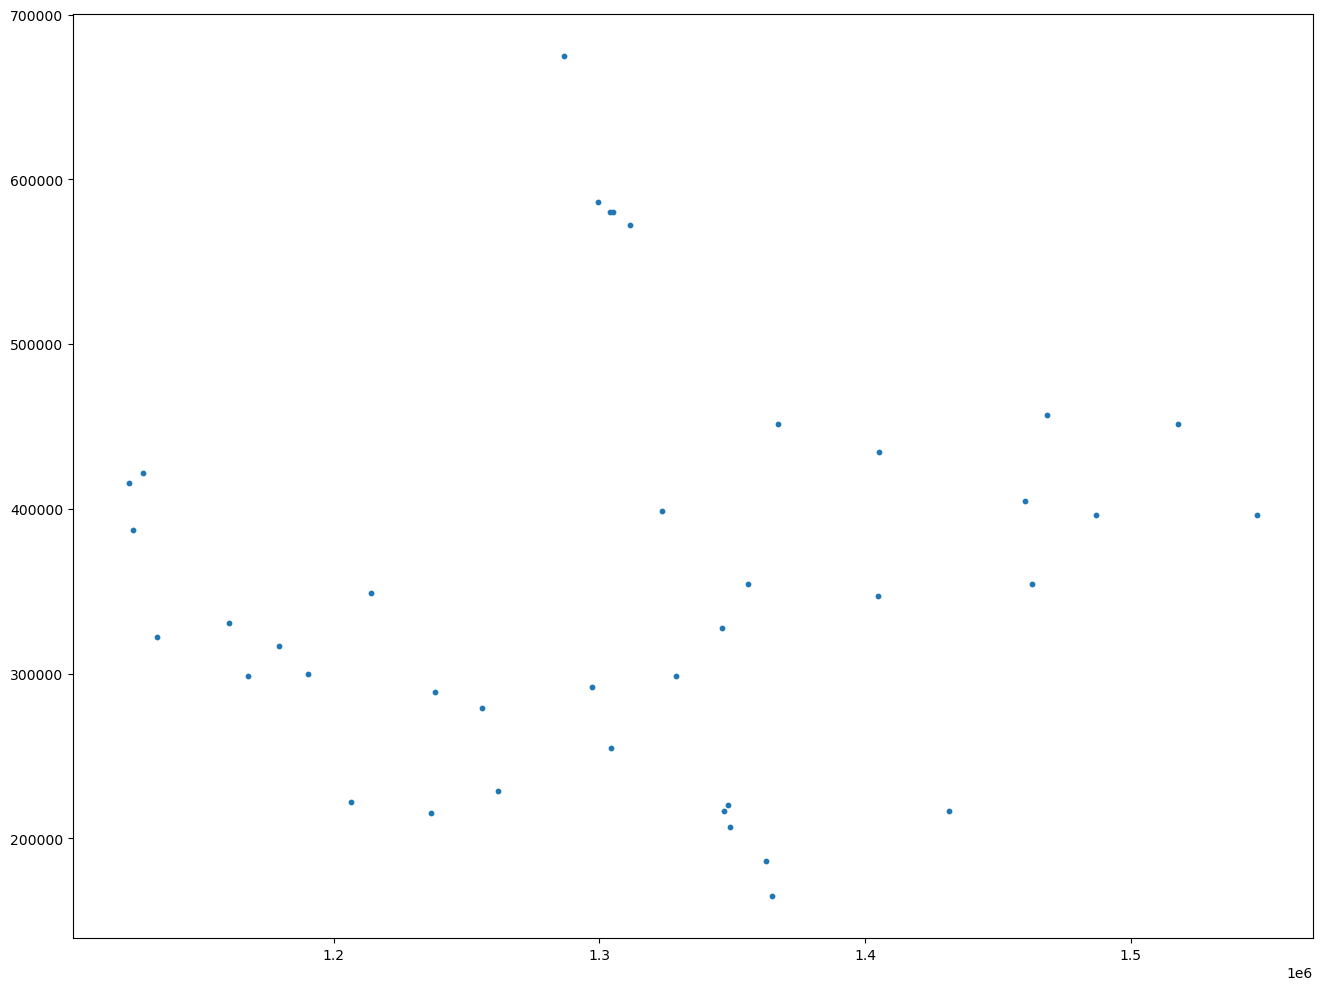

In [165]:
#Plotting the scatter plot
plt.scatter(x_train['Cash'], y_train, s=10)



Text(0, 0.5, 'Receivables')

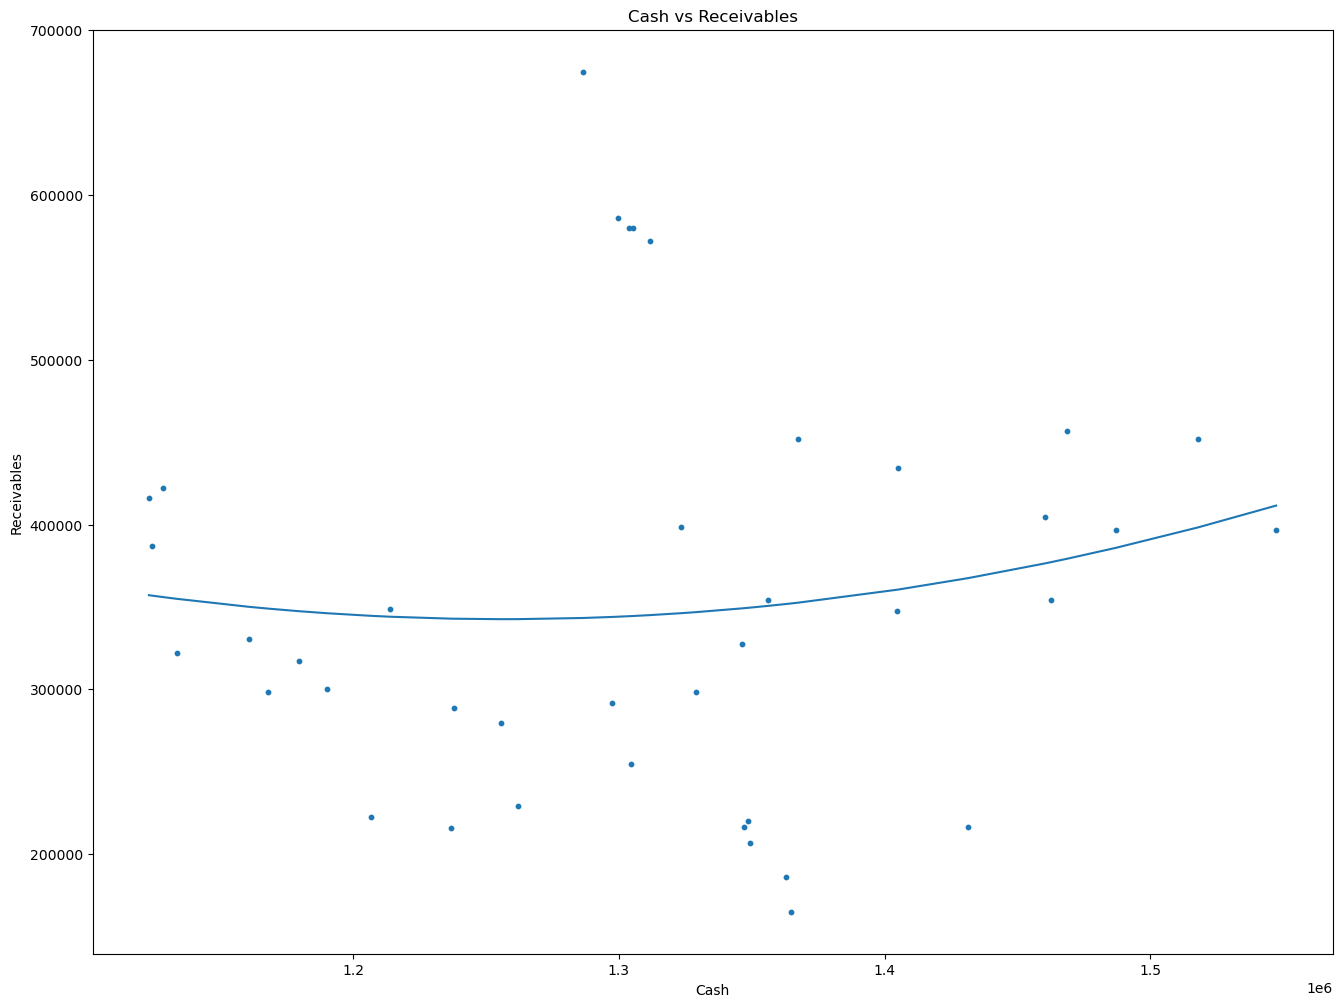

In [166]:
#Plotting the scatter plot
plt.scatter(x_train['Cash'], y_train, s=10)


#Plotting the curve
y_pred = pr.predict(x_train_transformed)
sorted_zip = sorted(zip(x_train['Cash'], y_pred))
x_train_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(x_train_sorted, y_pred_sorted)

plt.title('Cash vs Receivables')
plt.xlabel('Cash')
plt.ylabel('Receivables')

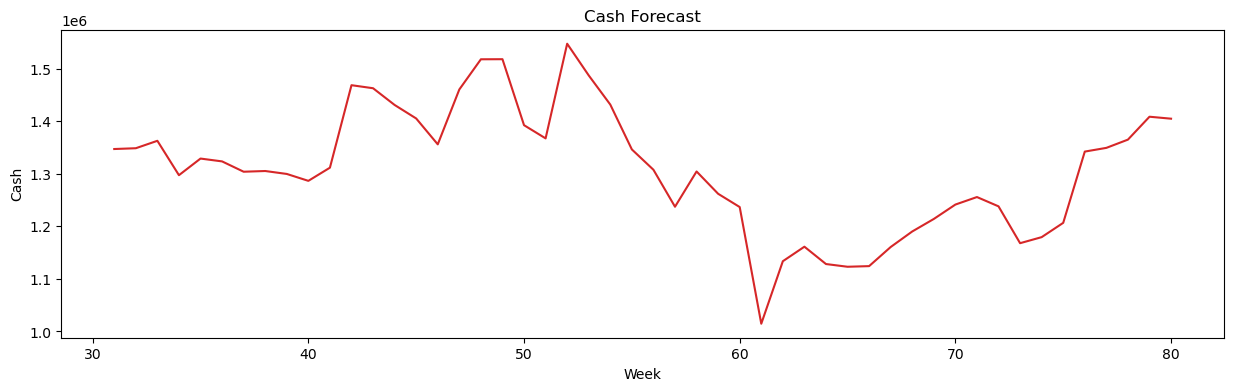

In [167]:
def plot_cash_df(cash_df, x, y, title="", xlabel='Week', ylabel='Cash', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_cash_df(cash_df, x=cash_df['Week'], y=cash_df['Cash'], title='Cash Forecast')

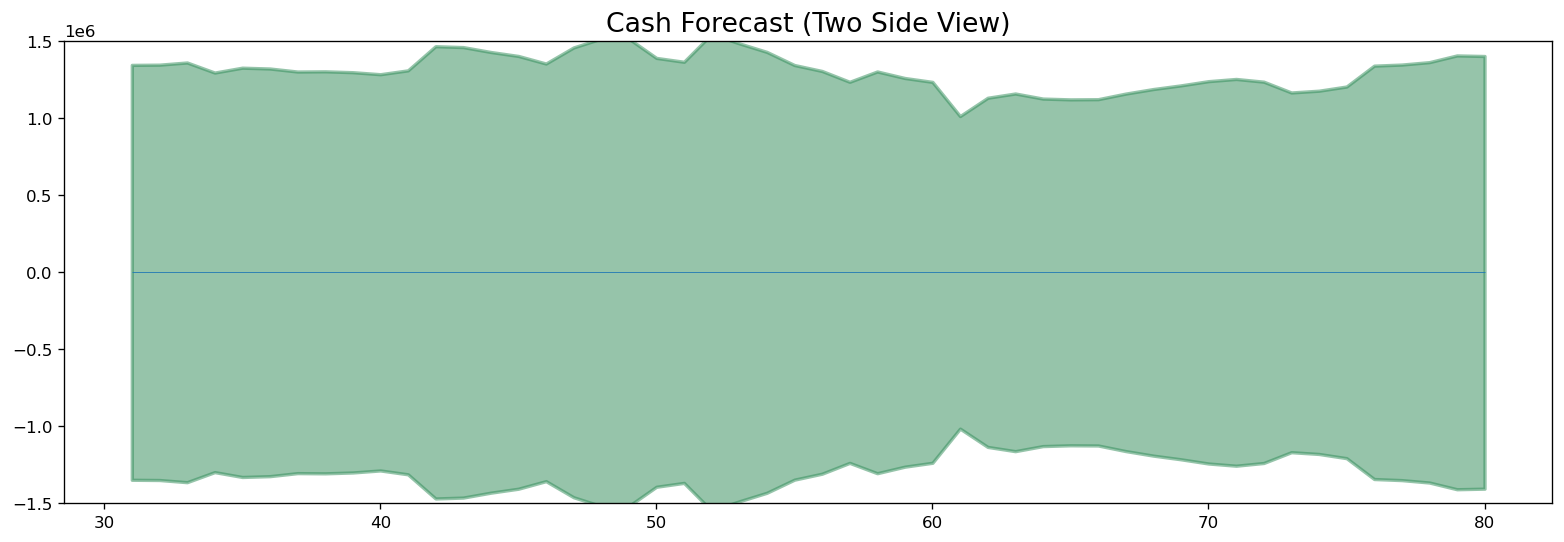

In [168]:
x = cash_df['Week'].values
y1 = cash_df['Cash'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-1500000, 1500000)
plt.title('Cash Forecast (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(cash_df['Week']), xmax=np.max(cash_df['Week']), linewidth=.5)
plt.show()


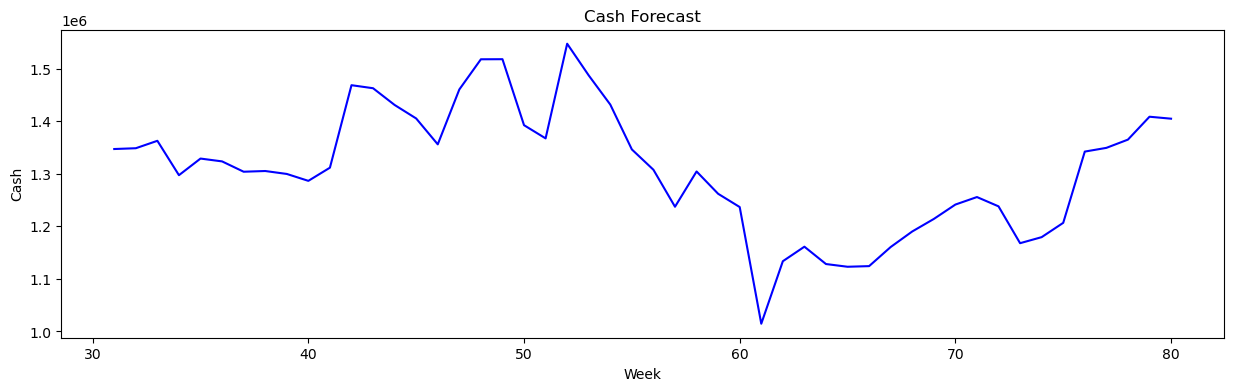

In [169]:
def plot_cash_df(cash_df, x, y, title="", xlabel='Week', ylabel='Cash', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_cash_df(cash_df, x=cash_df['Week'], y=cash_df['Cash'], title='Cash Forecast')

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

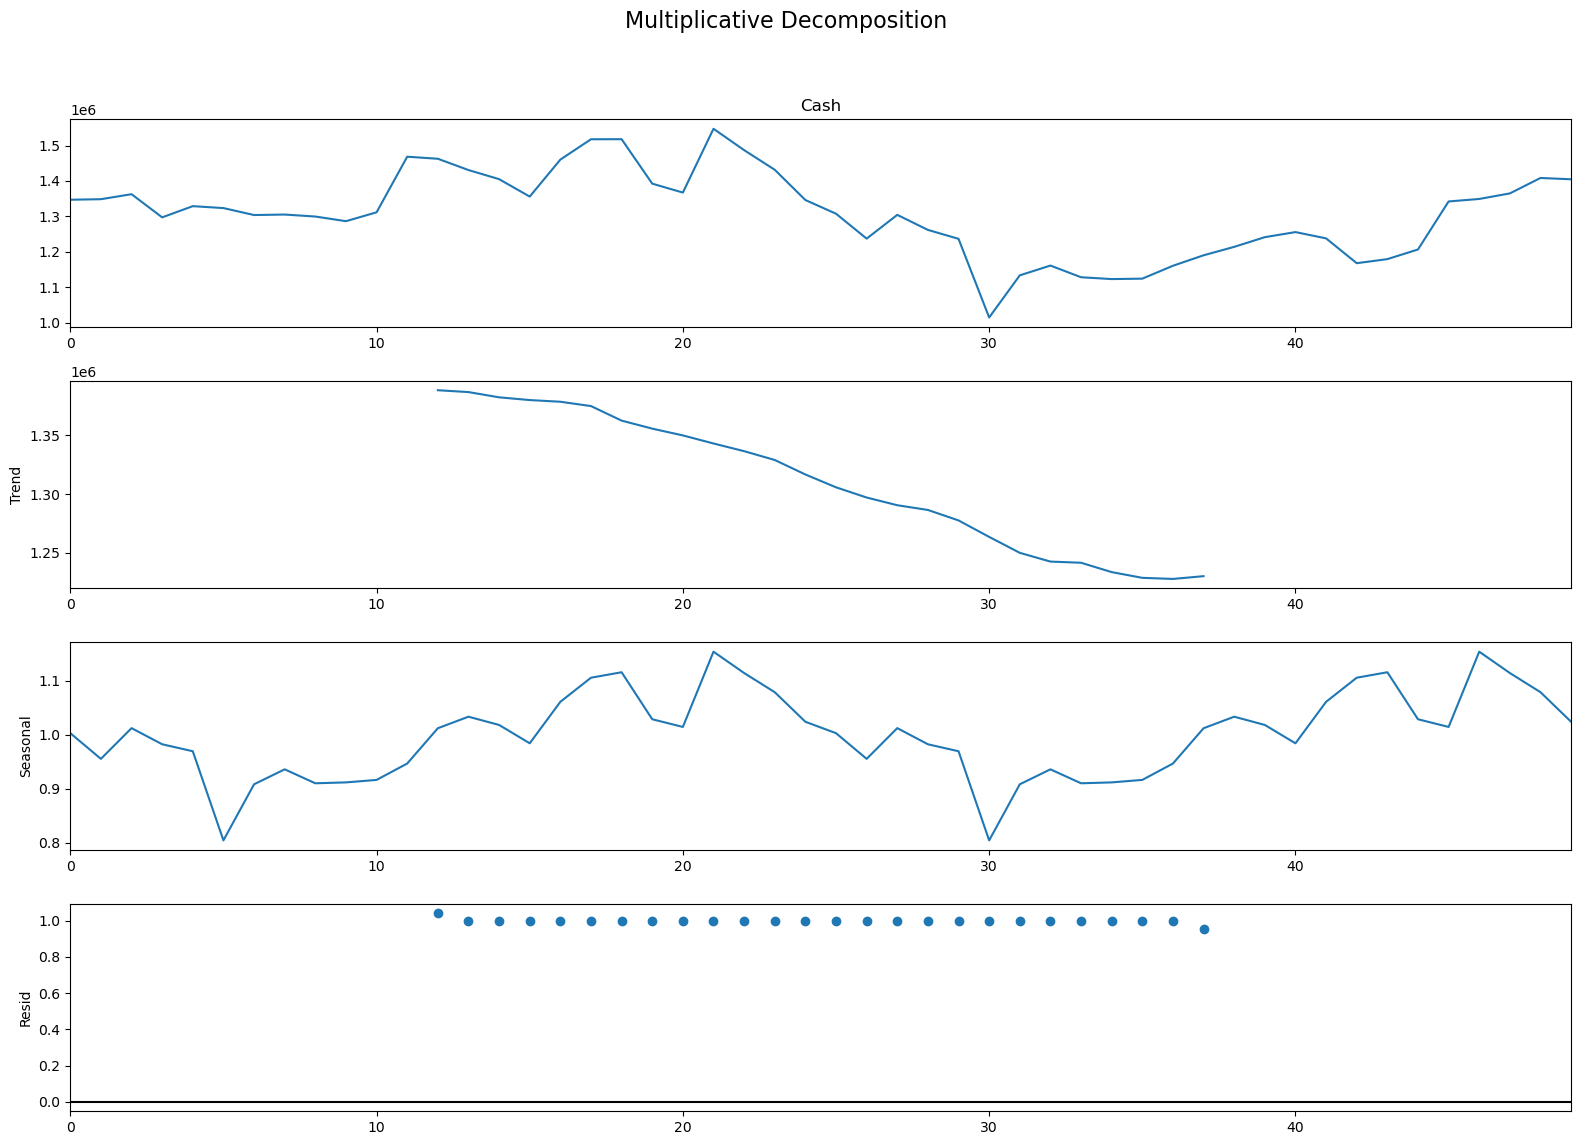

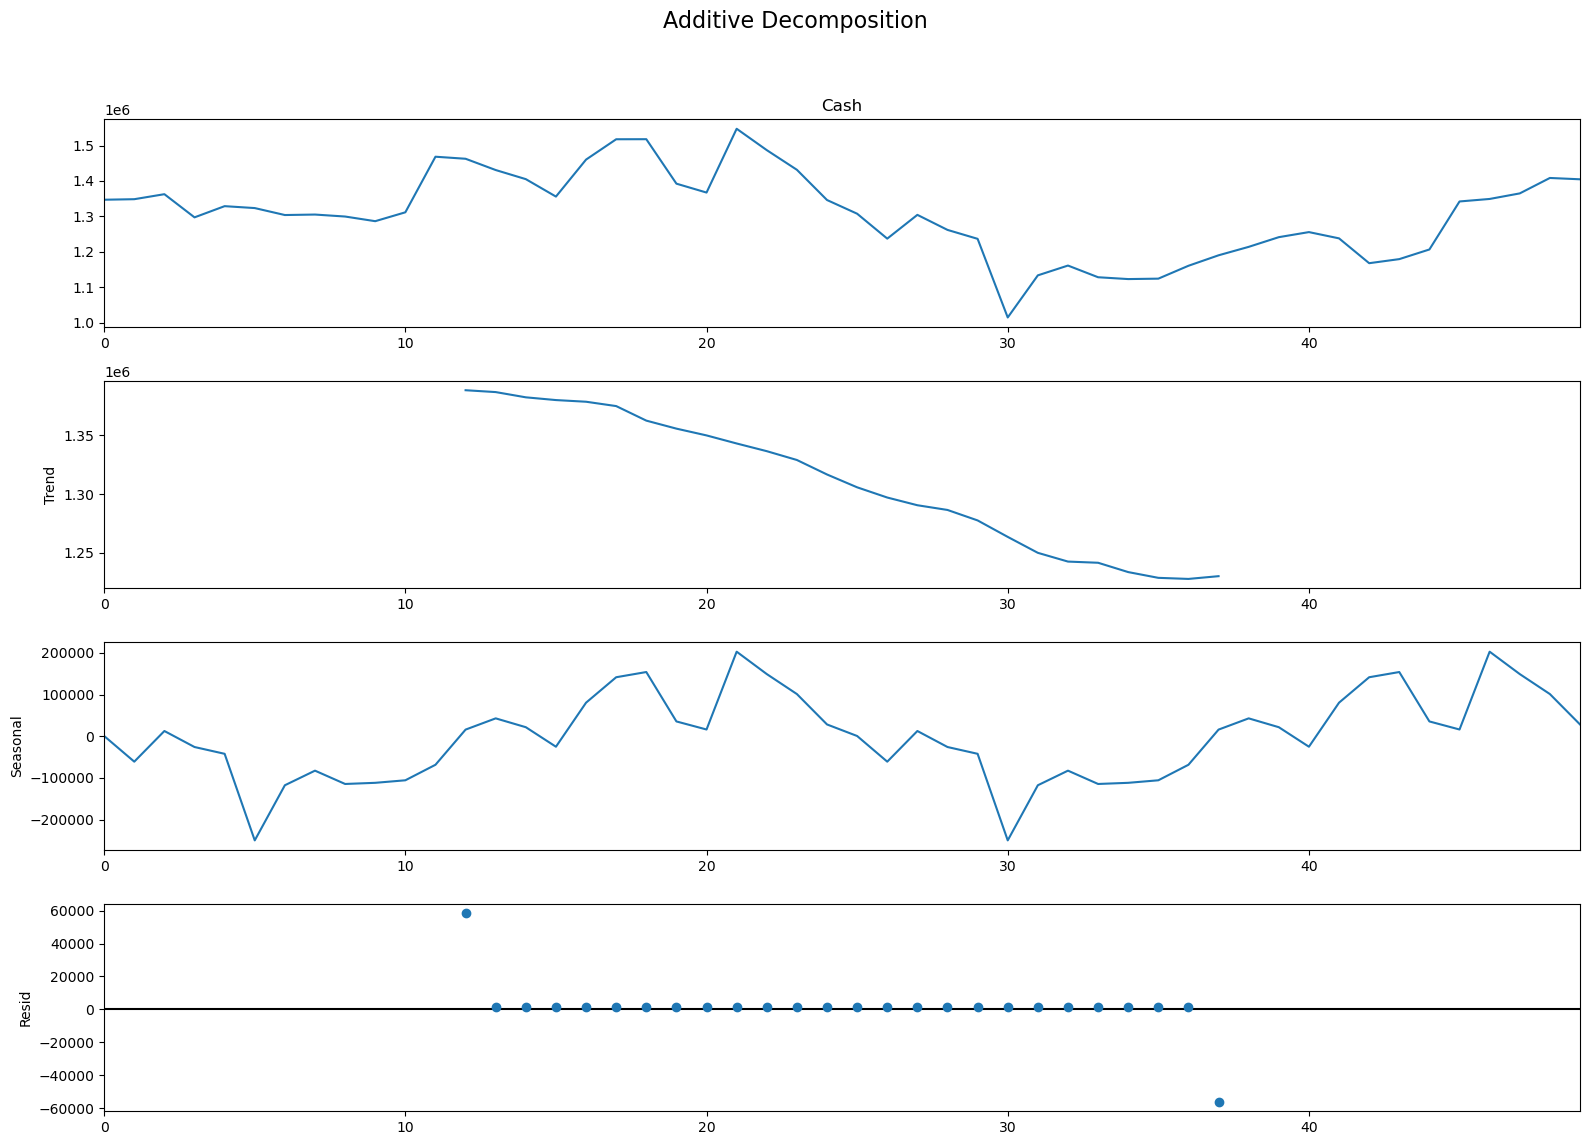

In [171]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(cash_df['Cash'], model='multiplicative', period=25)

# Additive Decomposition
additive_decomposition = seasonal_decompose(cash_df['Cash'], model='additive', period=25)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [172]:
#Split Train Test
import math
total_size=len(cash_df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=cash_df.head(train_size)
test=cash_df.tail(len(cash_df) -train_size)

In [173]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Create prediction table
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Cash'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))

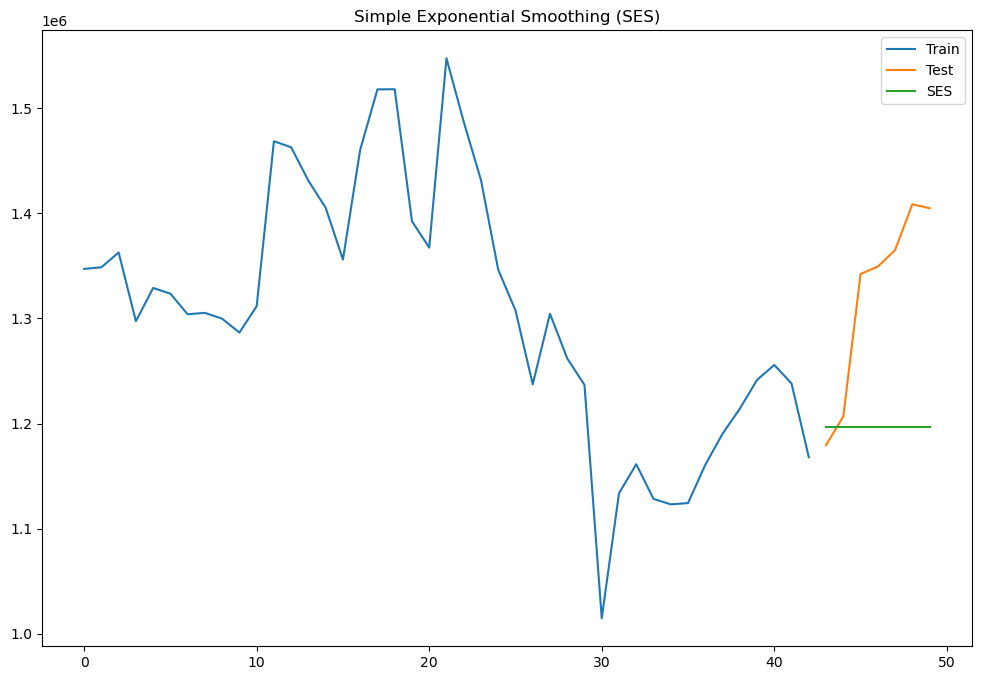

In [174]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Cash'], label='Train')
plt.plot(test.index,test['Cash'], label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

<AxesSubplot:>

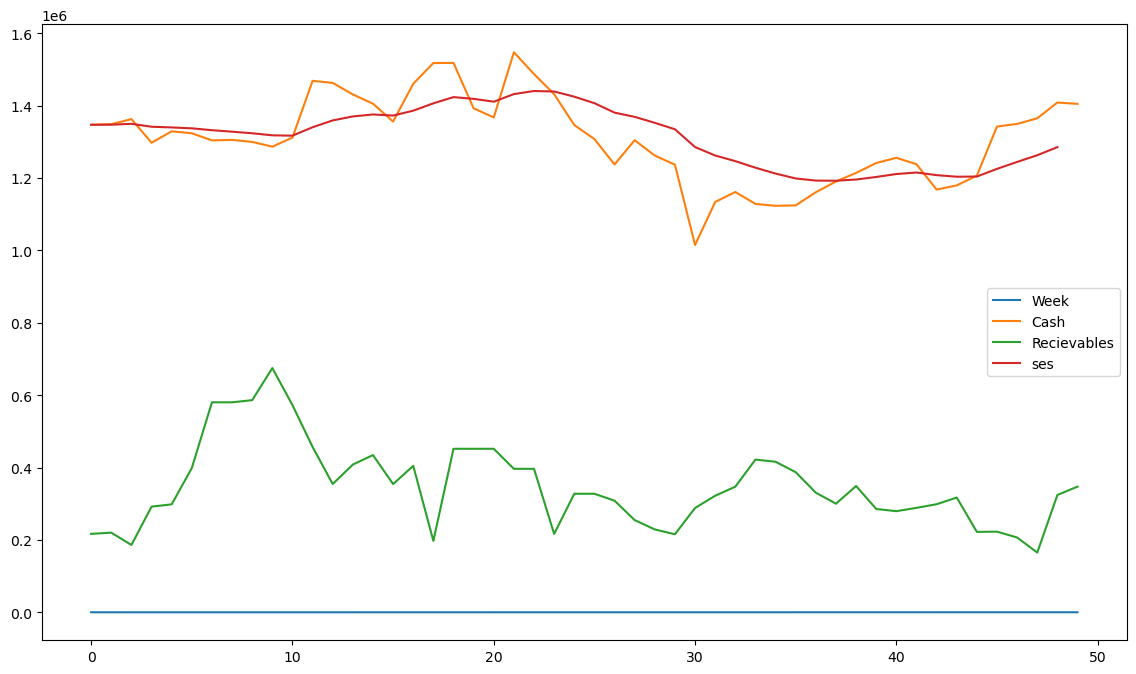

In [175]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# using single exponential smoothing

cash_df.index # freq None is not allowed for these computations
cash_df.index.freq = 'MS'
cash_df.index

span=12
alpha=2/(span+1)
model = SimpleExpSmoothing(cash_df['Cash'])
fit_model = model.fit(smoothing_level=alpha, 
                      optimized=False)
cash_df['ses'] = fit_model.fittedvalues.shift(-1)
cash_df.plot(figsize=(14, 8))

In [176]:
#Double Exponential Smoothing

C:\Users\User\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<AxesSubplot:>

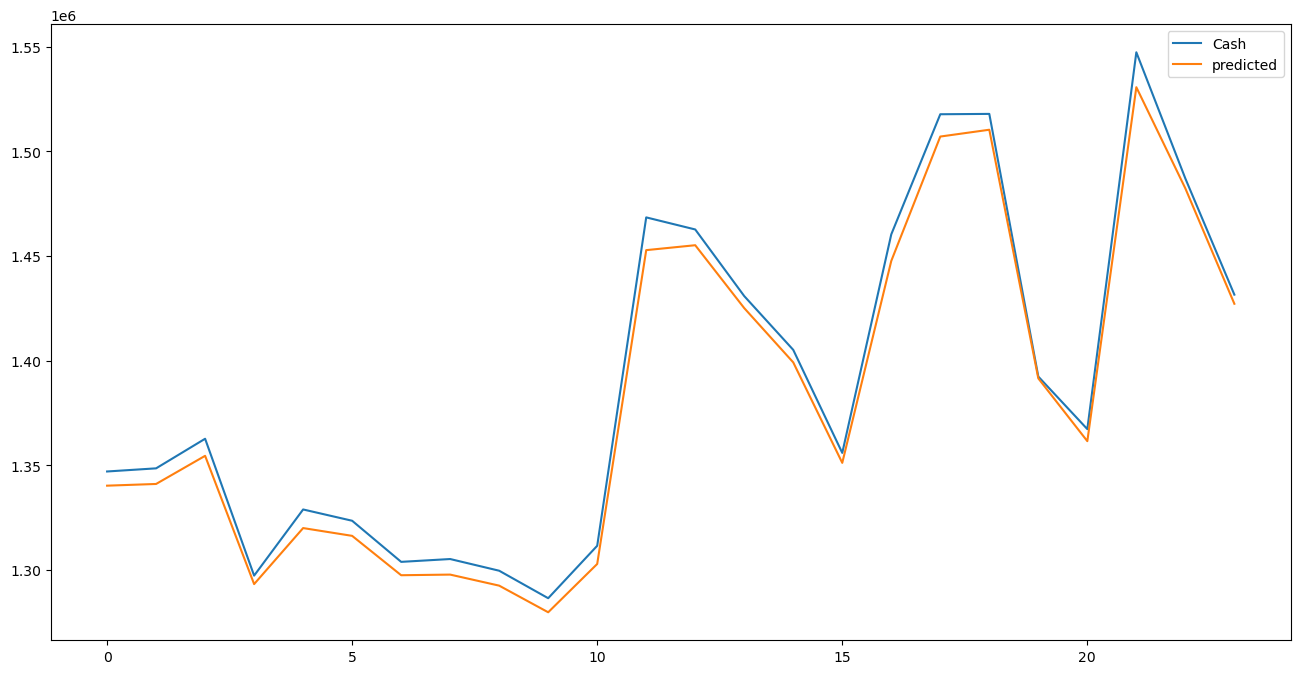

In [177]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_mod = ExponentialSmoothing(cash_df['Cash'], 
                               trend='add').fit()
cash_df['predicted'] = fit_mod.fittedvalues.shift(-1)
cash_df[['Cash', 'predicted']].iloc[:24].plot(figsize=(16,8))

In [178]:
#Making predictions with ARIMA

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


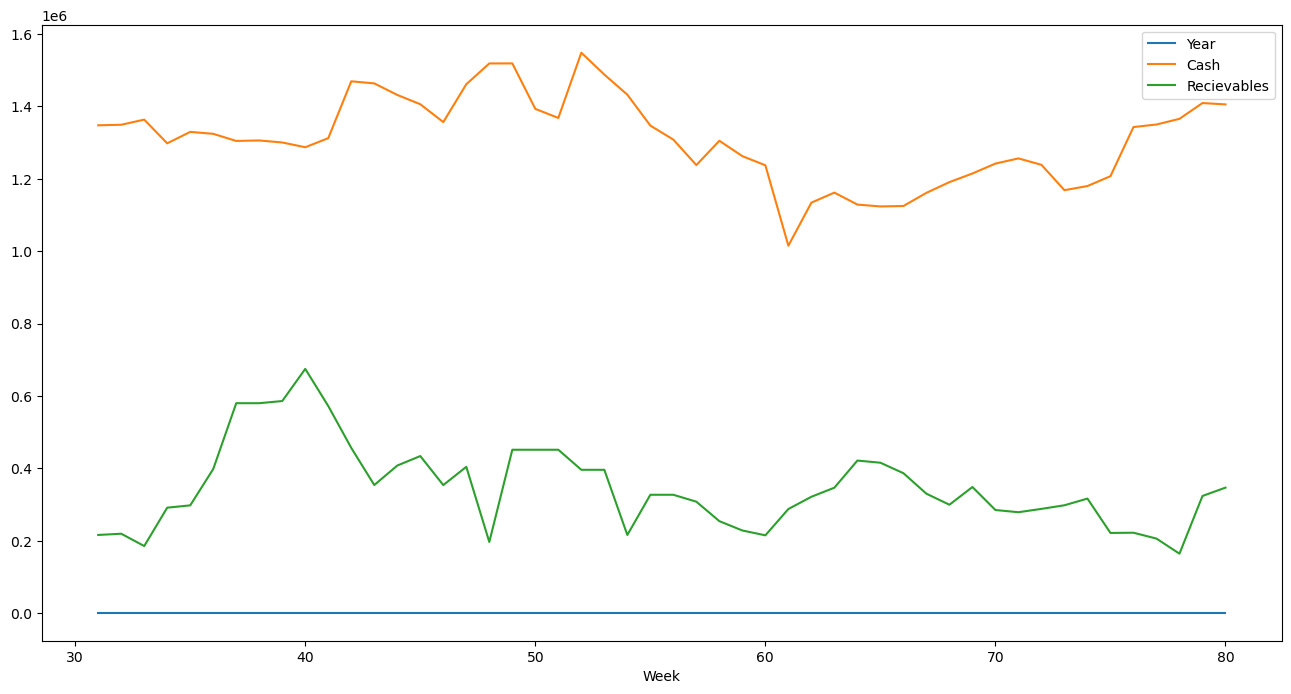

In [179]:
p_df = pd.read_csv('LB_Forecast_Cash.csv', 
                   index_col='Week', 
                   parse_dates= True)
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARIMAResults, ARMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

p_df.plot(figsize=(16,8))

# auto_arima(p_df, seasonal=True, trace=True).summary()

# ARIMA(2, 0, 2)
p_df.size # 480
train_cash_df = p_df.iloc[:384]
test_cash_df = p_df.iloc[384:]
mod = ARIMA(train_cash_df, order=(2,0,2))
res = mod.fit()
# res.summary()

start = len(train_cash_df)
end = len(train_cash_df) + len(test_cash_df) - 1
prediction = res.predict(start, end).rename('ARIMA Prediction')
p_df.plot(figsize=(16,8), legend = True)
prediction.plot(legend=True)
p_df.index

In [180]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
DT_predict = DT_model.predict(x_test) #Predictions on Testing data
print(DT_predict)

[325171.09666667 283963.895      415927.57       312881.19
 414849.50666667 411109.15       215610.15       469080.88
 313597.976      411109.15      ]


In [181]:
#Building the KNN Model on our dataset
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)
KNN_predict = KNN_model.predict(x_test) #Predictions on Testing data
print(KNN_predict)

[332698.28333333 261179.31333333 408301.36666667 254711.07666667
 414849.50666667 332698.28333333 261179.31333333 471699.01666667
 315330.15       411109.15      ]


C:\Users\User\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [182]:
# Python
cash_df_1 = pd.read_csv('LB_Forecast_Cash_1.csv')
cash_df_1.head()

,Year,Week,ds,y,Recievables
0,2022,31,1/3/2022,1347046.53,216637.49
1,2022,32,1/10/2022,1348547.51,220001.93
2,2022,33,1/17/2022,1362682.96,186053.69
3,2022,34,1/24/2022,1297296.15,291930.41
4,2022,35,1/31/2022,1328902.74,298268.57


In [183]:
# convert the 'Date' column to datetime format
cash_df_1['ds'] = cash_df_1['ds'].astype('datetime64[ns]')

In [184]:
# Check the format of 'Date' column
cash_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         50 non-null     int64         
 1   Week         50 non-null     int64         
 2   ds           50 non-null     datetime64[ns]
 3   y            50 non-null     float64       
 4   Recievables  50 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.1 KB


In [185]:
# Python
m = Prophet()
m.fit(cash_df_1)

12:01:06 - cmdstanpy - INFO - Chain [1] start processing
12:01:08 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
410,2023-12-08
411,2023-12-09
412,2023-12-10
413,2023-12-11
414,2023-12-12


In [187]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
410,2023-12-08,1.070199e+06,926165.180360,1.204683e+06
411,2023-12-09,1.069750e+06,920744.016264,1.207349e+06
412,2023-12-10,1.069302e+06,930752.935014,1.207786e+06
413,2023-12-11,1.068853e+06,927627.888099,1.209189e+06
414,2023-12-12,1.068404e+06,932993.761481,1.208270e+06


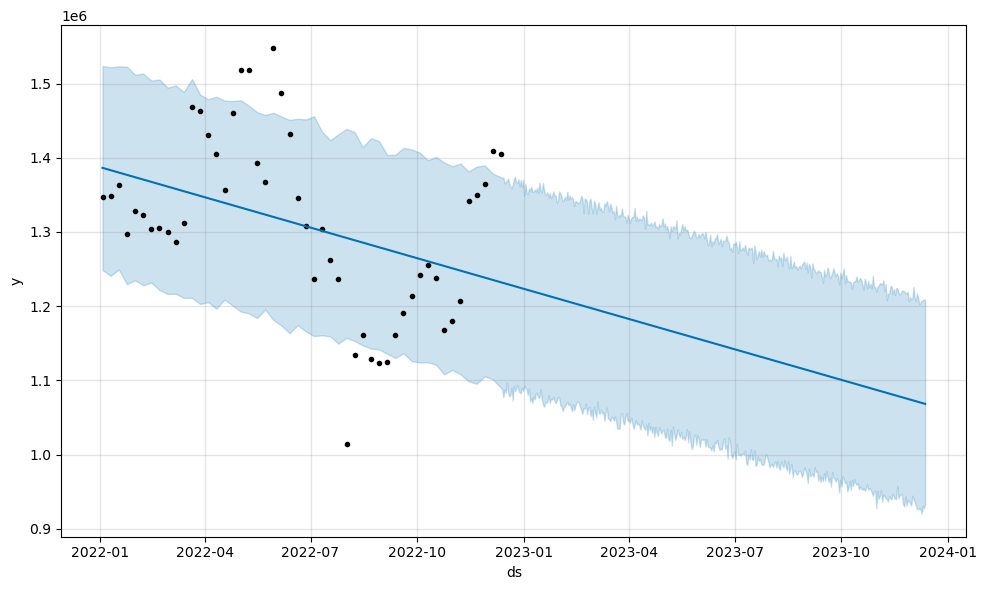

In [188]:
# Python
fig1 = m.plot(forecast)


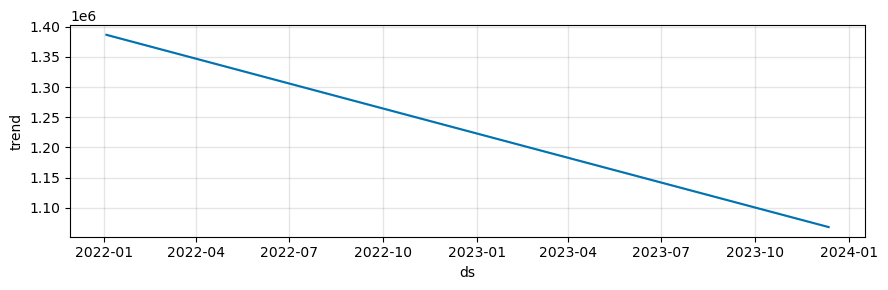

In [189]:
# Python
fig2 = m.plot_components(forecast)


In [190]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [191]:
# Python
plot_components_plotly(m, forecast)


In [192]:
# Python
rec_df_1 = pd.read_csv('LB_Forecast_Rec_1.csv')
rec_df_1.head()

,Year,Week,ds,y
0,2022,31,1/3/2022,216637.49
1,2022,32,1/10/2022,220001.93
2,2022,33,1/17/2022,186053.69
3,2022,34,1/24/2022,291930.41
4,2022,35,1/31/2022,298268.57


In [193]:
# convert the 'Date' column to datetime format
rec_df_1['ds'] = rec_df_1['ds'].astype('datetime64[ns]')

In [194]:
# Check the format of 'Date' column
rec_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    50 non-null     int64         
 1   Week    50 non-null     int64         
 2   ds      50 non-null     datetime64[ns]
 3   y       50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.7 KB


In [195]:
# Python
m = Prophet()
m.fit(rec_df_1)

12:02:31 - cmdstanpy - INFO - Chain [1] start processing
12:02:32 - cmdstanpy - INFO - Chain [1] done processing


In [196]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
410,2023-12-08
411,2023-12-09
412,2023-12-10
413,2023-12-11
414,2023-12-12


In [197]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
410,2023-12-08,111907.100550,-30603.102947,254615.950360
411,2023-12-09,111465.535925,-26730.164652,244518.119579
412,2023-12-10,111023.971300,-22515.366196,241617.739710
413,2023-12-11,110582.406675,-23982.816808,246740.965429
414,2023-12-12,110140.842050,-28593.261662,248359.988066


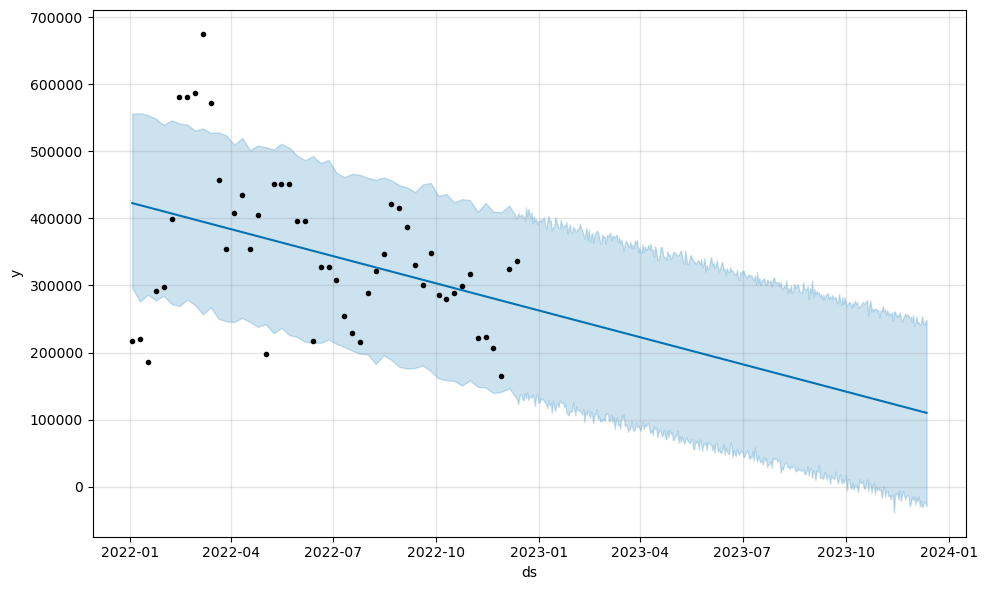

In [198]:
# Python
fig1 = m.plot(forecast)

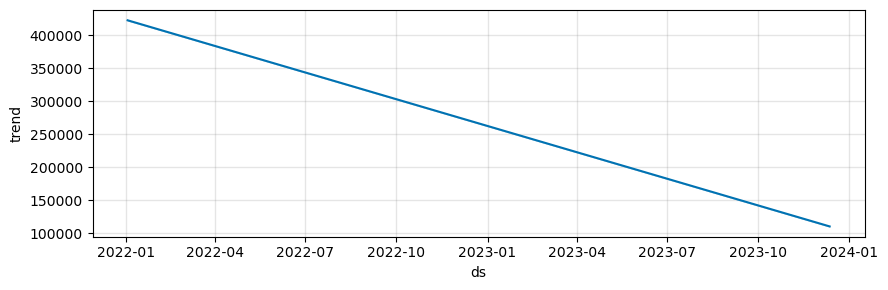

In [199]:
# Python
fig2 = m.plot_components(forecast)

In [200]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [201]:
# Python
plot_components_plotly(m, forecast)

In [232]:
# Python
sales_df = pd.read_csv('LB_Sales.csv')
sales_df.head()

,ds,y
0,1/1/2020,1370.00
1,1/1/2020,110.00
2,1/1/2020,545.40
3,1/1/2020,807.50
4,1/1/2020,772.65


In [233]:
# convert the 'Date' column to datetime format
sales_df['ds'] = sales_df['ds'].astype('datetime64[ns]')

In [234]:
# Check the format of 'Date' column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2328 non-null   datetime64[ns]
 1   y       2328 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.5 KB


In [235]:
# Python
m = Prophet()
m.fit(sales_df)

16:34:01 - cmdstanpy - INFO - Chain [1] start processing
16:34:02 - cmdstanpy - INFO - Chain [1] done processing


In [236]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
769,2023-11-28
770,2023-11-29
771,2023-11-30
772,2023-12-01
773,2023-12-02


In [237]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
769,2023-11-28,6246.223230,-44623.384579,55733.697493
770,2023-11-29,2293.432753,-45328.384242,51075.399309
771,2023-11-30,553.161867,-50188.508877,49603.126853
772,2023-12-01,5737.376058,-42448.366013,53277.780497
773,2023-12-02,539.923806,-44927.358070,48877.034512


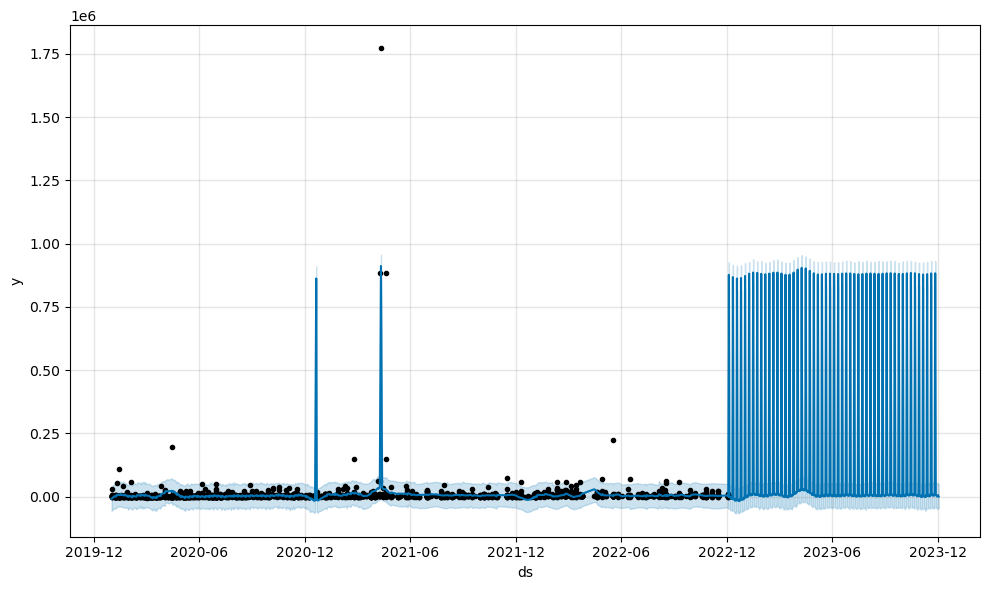

In [238]:
# Python
fig1 = m.plot(forecast)

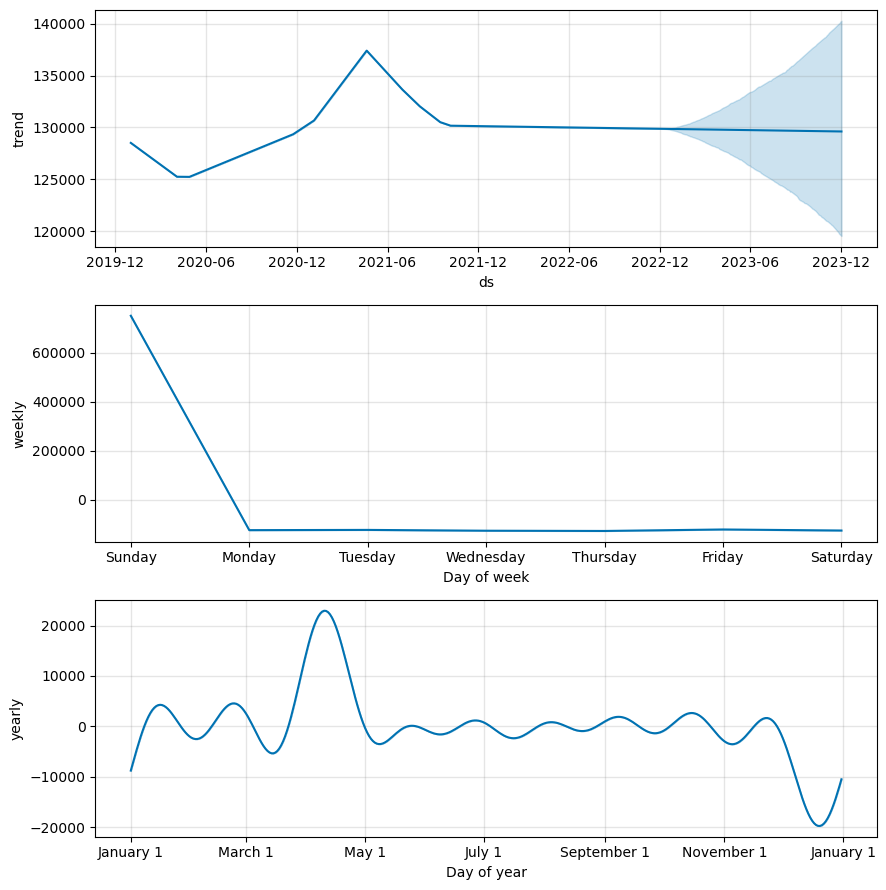

In [239]:
# Python
fig2 = m.plot_components(forecast)

In [240]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [241]:
# Python
plot_components_plotly(m, forecast)